In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import animation

Question 1(a)

In [63]:
dx=0.1
n=224

In [64]:
diag_0=np.diag(np.ones(n),0)
diag_p1=np.diag(np.ones(n-1),1)
diag_m1=np.diag(np.ones(n-1),-1)

In [65]:
np.diag(np.ones(3),0)
np.diag(np.ones(1),2)

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [66]:
mat_A=(1/dx**2)*(diag_m1-2*diag_0+diag_p1)
mat_B=(1/12)*(diag_m1+10*diag_0+diag_p1)

In [67]:
gamma2=2

In [68]:
mat_v=np.zeros((n,n))
for i in range(n):
    mat_v[i,i]=np.sqrt(np.abs(i-(n)/2)*(dx))

In [69]:
the_matrix=((-1/gamma2)*np.dot(np.linalg.inv(mat_B),mat_A)+mat_v)

In [70]:
E_list2,wf_list2=np.linalg.eig(the_matrix)
idx_sorted2 = np.argsort(E_list2)
E_list2=E_list2[idx_sorted2]
wf_list2=wf_list2[:,idx_sorted2]

In [72]:
import mpl_toolkits.axisartist as axisartist

Text(0.5, 1.0, 'Probability Density')

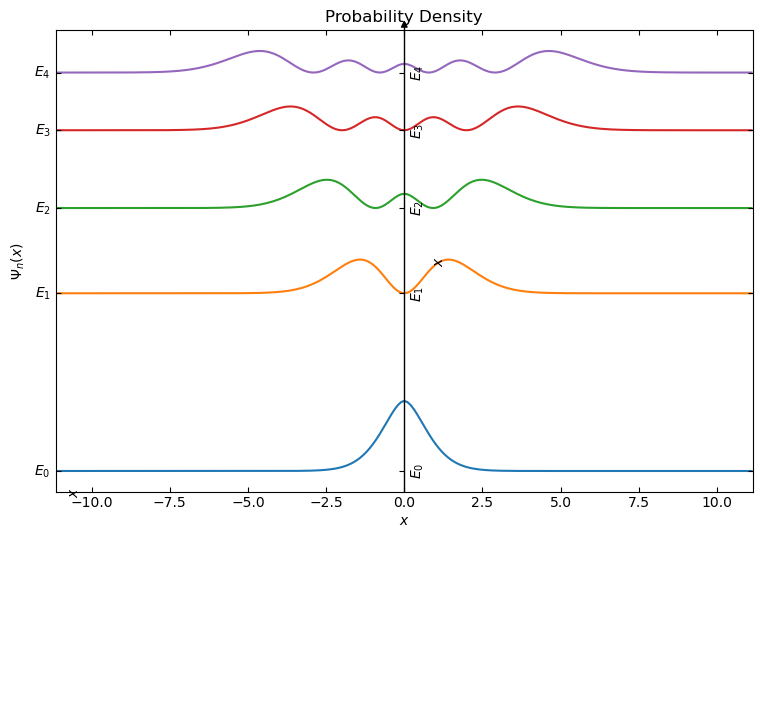

In [82]:
n_list=np.arange(0,n)
fig=plt.figure(figsize=(9,6))
ax = axisartist.Subplot(fig, 111)
#ax = plt.subplot(111)
fig.add_axes(ax)
for i in range(5):
        plt.plot((n_list-n/2)*dx,(wf_list2[:,i])**2*float(5)+E_list2[i],label=str(i))
    #wf_list2[:,i])**2*20+1*i
plt.xlabel(r'$x$')
plt.ylabel(r'$\Psi_n(x)$')
plt.yticks([E_list2[0],E_list2[1],E_list2[2],E_list2[3],E_list2[4]],[r'$E_0$',r'$E_1$',r'$E_2$',r'$E_3$',r'$E_4$'])
plt.xlim(-11.15,11.15)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#ax.axis[:].set_visible(False)
ax.axis["y"] = ax.new_floating_axis(1,0)
ax.axis["y"].set_axisline_style("-|>", size = 1.0)
ax.axis["x"] = ax.new_floating_axis(0,0)
plt.title('Probability Density')

Question 1(b)

In [74]:
for i in range(5):
    print(E_list2[i])

0.915426515818574
1.5960637418141128
1.92248810081159
2.2204685802931055
2.441463413338025


Question 2 

In [75]:
hbar=1
m=1
x0=0
L=40
sigma0=1
k0=7
N=401
tau=0.03
tn=600
h=0.1
x_list=[]
for i in range(N):
    x_list.append(i*h-L/2)

In [76]:
psi_list=np.zeros((tn,N),dtype=np.complex64)
#set psi_0
for i in range(N):
    psi_list[0,i]=(1/np.sqrt(sigma0*np.sqrt(np.pi)))*np.exp((1j)*k0*(x_list[i]-x0))*np.exp(-0.5*np.power(x_list[i]-x0,2)/(np.power(sigma0,2)))

In [77]:
sum=0
for i in psi_list[0]:
    sum+=abs(i)**2*h
print('as the sum of possibility is:',sum,'we can say it is normalized')

as the sum of possibility is: 0.9999999825424379 we can say it is normalized


In [78]:
matrix_H=np.zeros((N,N))
#first row
matrix_H[0,0]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[0,1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#last row
matrix_H[N-1,N-1]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[N-1,N-2]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#other rows
V = np.zeros([N])
factor = 0.01

for i in range(1,N-1):
    matrix_H[i,i]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
    matrix_H[i,i+1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
    matrix_H[i,i-1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
    if 80<i<140:
        matrix_H[i,i]+=k0**2/2*np.cos(np.pi*((i-200)/10+9)/6)
        V[i] = (k0**2/2*np.cos(np.pi*((i-200)/10+9)/6))*factor 
    elif 260<i<321:
        matrix_H[i,i]+=k0**2/2*np.cos(np.pi*((i-200)/10-9)/6)
        V[i] = k0**2/2*np.cos(np.pi*((i-200)/10-9)/6)*factor 
        
        


        
        

    
    

In [79]:

mat_1plus_inv=np.linalg.inv(np.identity(N)+((1j*tau)/(2*hbar))*matrix_H)
mat_1minus=np.identity(N)-((1j*tau)/(2*hbar))*matrix_H

In [80]:
for i in range(1,tn):
    psi_list[i]=np.dot(np.dot(mat_1plus_inv,mat_1minus),psi_list[i-1].reshape(N,1)).reshape(N,)

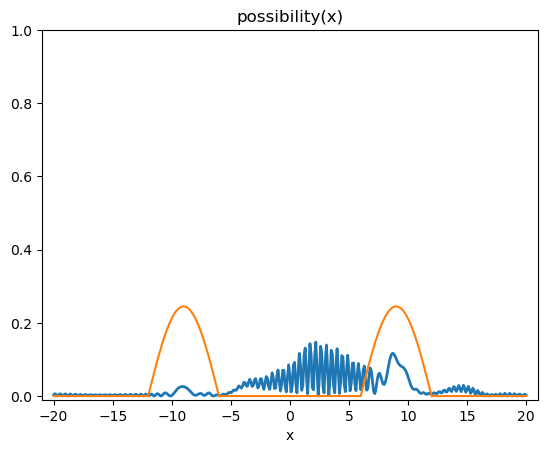

In [81]:
fig2, ax2 = plt.subplots()
line2, = ax2.plot([], [], lw=2)
plt.xlim(-21,21)
plt.ylim(-0.01,1.0)
plt.plot(x_list,V)
ax2.set_xlabel('x')
ax2.set_title('possibility(x)')
def animate2(i):
    xx=x_list
    yy=abs(psi_list[i*4])**2
    line2.set_data(xx, yy)
    return (line2,)
anim2 = animation.FuncAnimation(fig2, animate2, frames=150, interval=150, blit=True)
rc('animation', html='jshtml')
anim2